# <center>Trabajo Semanal 2</center>
### <center> Autor: Arturo Huber </center>

## Introducción teórica
En este trabajo abordaremos el tema de los Sistemas Lineales e Invariantes en el Tiempo - Sistemas LTI, su caracterización y su simulación mediante Python. Para ello, vamos a utilizar los siguientes fundamentos teóricos.

**Sistemas LTI**

Un sistema lineal e invariante en el tiempo (LTI) es aquel que cumple dos propiedades fundamentales:<br>
*Linealidad*:  La salida ante una combinación lineal de entradas es igual a la misma combinación lineal de las salidas individuales.

$$
x[n] = a·x1[n] + b·x2[n]  ->  y[n] = a·y1[n] + b·y2[n]
$$

*Invarianza en el tiempo*: Si la entrada se desplaza en el tiempo, la salida se desplaza en la misma cantidad sin cambiar su forma.

$$
x[n−n_0]⇒y[n−n_0]
$$


**Ecuaciones en diferencias**

En el caso discreto, los sistemas LTI  se pueden describir mediante ecuaciones en diferencias lineales con coeficientes constantes.

De forma general:

$$
\sum_{k=0}^{N} a_k \, y[n-k] \;=\; \sum_{m=0}^{M} b_m \, x[n-m]
$$

Donde:
* Los términos de la derecha (dependientes de la entrada) representan la parte forzada del sistema.
* Los términos de la izquierda (dependientes de salidas pasadas) representan la parte natural o transitoria.

Existen dos clases principales de sistemas:
FIR (Finite Impulse Response): no dependen de salidas pasadas, solo de entradas presentes y pasadas.
IIR (Infinite Impulse Response): incluyen salidas pasadas (realimentación), por lo que la respuesta nunca se anula.

**Respuesta al impulso**

La respuesta al impulso $h[n]$ se obtiene aplicando como entrada un impulso unitario:
$$
x[n]=δ[n]⇒y[n]=h[n]
$$

Las propiedades de *linealidad* e *Invarianza en el tiempo*, nos permiten caracterizar los sistemas LTI mediante su respuesta al impulso. Es decir, conociendo $h[n]$, se puede obtener la salida para cualquier señal de entrada mediante la operación de convolución con la respuesta al impulso. Por lo que:

$$
y[n] = x[n] * h[n]
$$

Siendo:
* $y[n]$: La salida del sistema
* $x[n]$: La señal de entrada al sistema
* $h[n]$: La respuesta al impulso

## Análisis y Desarrollo

**Punto 1**

Para la realización del primer punto, se importan las señales del primer trabajo semanal. Las señales son:
* La señal *Original* : Señal senoidal de amplitud: 1, frecuencia: 2KHz, fase: 0
* La señal *Amplificada y desafazada*: Señal senoidal de amplitud: 2, frecuencia: 2KHz, fase: $\pi/2$
* La señal *Modulada* : La señal *Original* modulada con otra senoidal de la mitad de la frecuencia
* La señal *Modulada y Recortada* : La señal anterior recortada al 75% de su amplitud maxima
* La señal *Cuadrada*: Señal cuadrada de amplitud 1 y frecuencia de 4KHz
* La señal *Pulso*: Un pulso de 10ms de amplitud uno

Para calcular la salida de las señales del siguiente sistema LTI:

$$
y[n]=3⋅10−2⋅x[n]+5⋅10−2⋅x[n−1]+3⋅10−2⋅x[n−2]+1.5⋅y[n−1]−0.5⋅y[n−2]
$$

Se programa la siguiente función:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from TS1 import Original, y2, s_am, s_clip, sq, pulso, fs

def sistema_lti(x, nombre):
    """
    Resuelve
    y[n] = 0.03 x[n] + 0.05 x[n-1] + 0.03 x[n-2] + 1.5 y[n-1] - 0.5 y[n-2]

    Parámetros
    ----------
    x :  Vector
        Señal de entrada x[n] 
    
    Returns
    -------
    y : Vector
        Señal de salida y[n]
    """
    Ts = 1/fs
    N = len(x)
    t = np.arange(N) * Ts
    y = np.zeros(N, dtype=float)

    for n in range(N):
        
        # Si los coeficientes son negativos, el resultado es 0        
        if n-1 >= 0:
            x1 = x[n-1]
            y1 = y[n-1]
        else:
            x1 = 0.0
            y1 = 0.0

        if n-2 >= 0:
            x2 = x[n-2]
            y2 = y[n-2]
        else:
            x2 = 0.0
            y2 = 0.0

        # Calculo
        y[n] = 0.03*x[n] + 0.05*x1 + 0.03*x2 + 1.5*y1 - 0.5*y2
        
    # Grafico
    plt.figure(figsize=(10,5))
    plt.plot(t, y, label="Salida")
    plt.title(f"Respuesta a la señal {nombre}")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.legend()
    plt.show()
    

   #print(f"Potencia de la señal {nombre} = {np.mean(y**2):.3f}")

    return y

Y graficacmos las salidas

Para las simulaciones se toma un fs = 50000 y una duracion de 0.01 



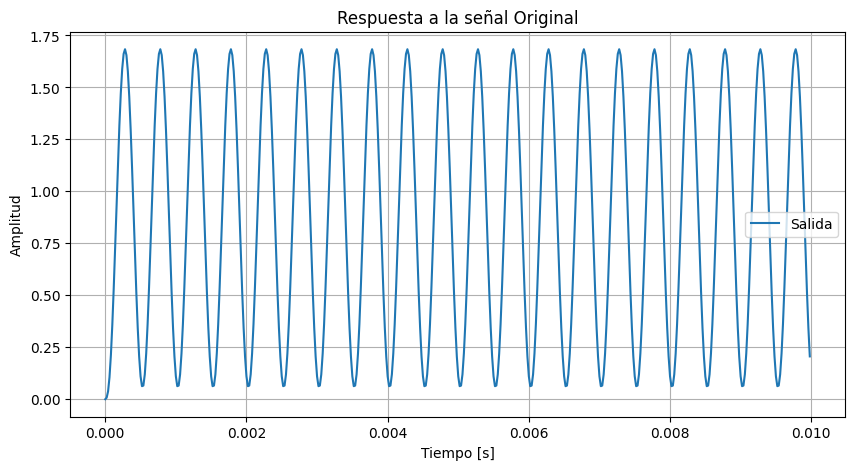

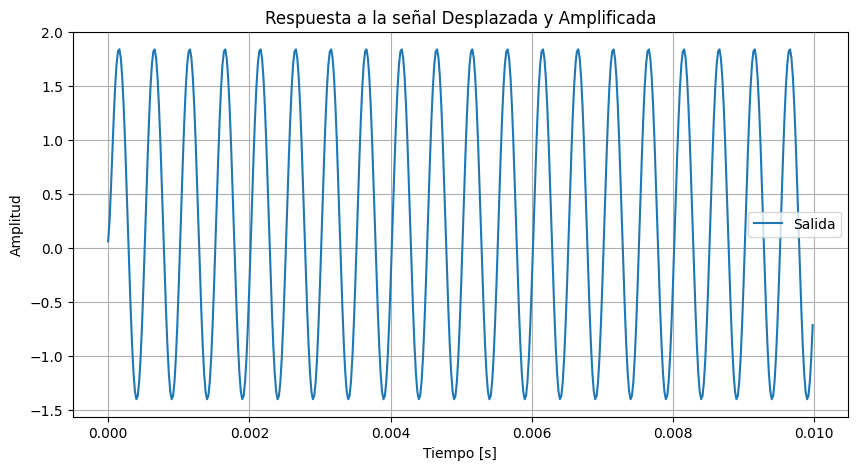

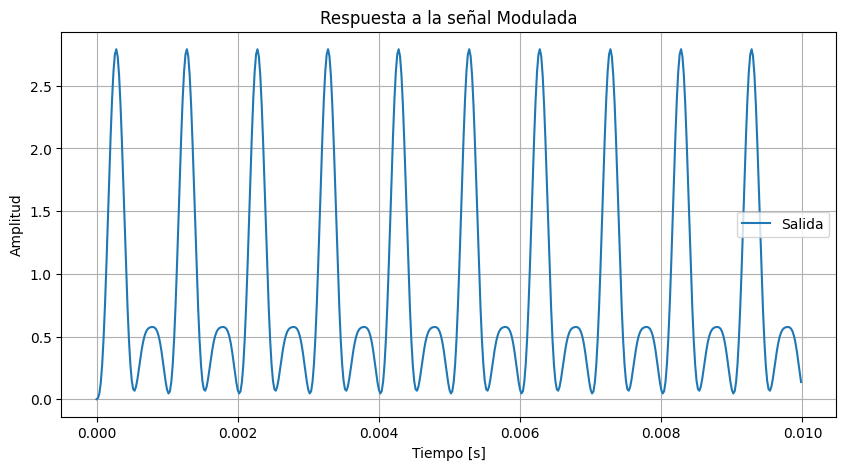

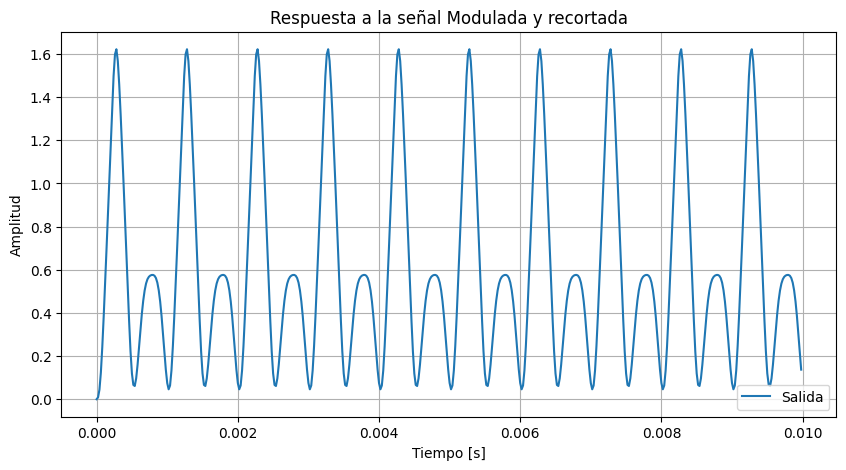

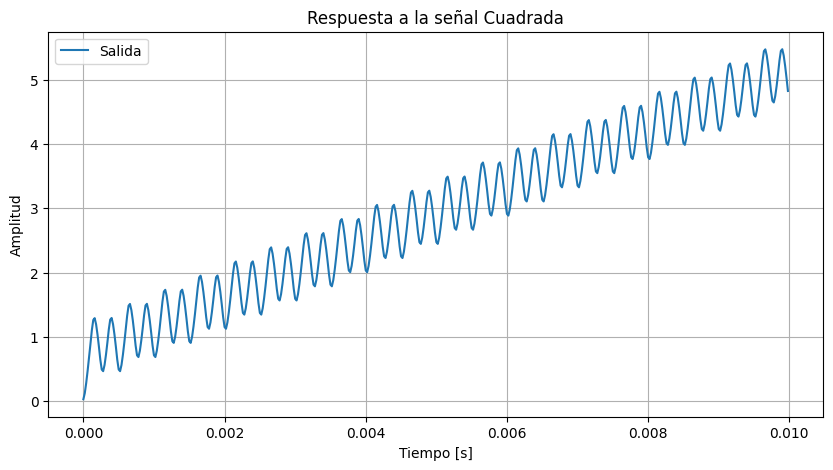

array([0.03      , 0.125     , 0.2825    , 0.47125   , 0.675625  ,
       0.8878125 , 1.10390625, 1.26195313, 1.29097656, 1.19548828,
       1.03774414, 0.84887207, 0.64443604, 0.49221802, 0.46610901,
       0.5630545 , 0.72152725, 0.91076363, 1.11538181, 1.26769091,
       1.29384545, 1.19692273, 1.03846136, 0.84923068, 0.64461534,
       0.49230767, 0.46615384, 0.56307692, 0.72153846, 0.91076923,
       1.11538461, 1.32769231, 1.48384615, 1.51192308, 1.41596154,
       1.25798077, 1.06899038, 0.86449519, 0.7122476 , 0.6861238 ,
       0.7830619 , 0.94153095, 1.13076547, 1.33538274, 1.48769137,
       1.51384568, 1.41692284, 1.25846142, 1.06923071, 0.86461536,
       0.71230768, 0.68615384, 0.78307692, 0.94153846, 1.13076923,
       1.33538461, 1.54769231, 1.70384615, 1.73192308, 1.63596154,
       1.47798077, 1.28899038, 1.08449519, 0.9322476 , 0.9061238 ,
       1.0030619 , 1.16153095, 1.35076547, 1.55538274, 1.70769137,
       1.73384568, 1.63692284, 1.47846142, 1.28923071, 1.08461

In [6]:
N = 500          
print(f"Para las simulaciones se toma un fs = {fs} y una duracion de {N/fs:.2f} \n")
sistema_lti(Original, "Original")                      # Senoidal f: 2KHz A:1 fase :0
sistema_lti(y2, "Desplazada y Amplificada")            # Senoidal f: 2KHz A:2 fase :p1/2
sistema_lti(s_am, "Modulada")                          # Señal original modulada
sistema_lti(s_clip, "Modulada y recortada")            # Señal anterior recortada
sistema_lti(sq, "Cuadrada")                            # Cuadrada f: 4KHz A:1
#sistema_lti(pulso, "Pulso")                            # Pulso de 10ms


## Conclusiones

## Autoevaluación de aprendizaje